Preprocessing the data to create a 2D tangent embedded correlation matrix for each individual timeseries

Note: currently testing with only 50 individuals --> will run with full dataset when ready for experiments

In [1]:
#Import tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

!pip install nilearn

from nilearn.datasets import fetch_abide_pcp
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [12]:
#Download ABIDE data

abide = fetch_abide_pcp(pipeline='cpac', derivatives = ['rois_cc400'], n_subjects=50)

print(abide.keys())
print(abide.phenotypic['SEX'])

dict_keys(['description', 'phenotypic', 'rois_cc400'])
[1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 2 2 1]


In [13]:
#Retrieving the functional dataset

func = abide.rois_cc400

print(func[2])

[[ 13.159222  49.410997  11.108494 ...  21.216806  24.961605  31.475766]
 [ -3.840857 -57.656446 -18.228895 ...  -6.282409   4.650085   4.038668]
 [-33.557319  42.479156  13.229486 ...   0.797642  58.791057  63.509008]
 ...
 [-43.940612 -25.31711  -10.290229 ...  33.578069   6.562558  -2.242751]
 [  1.455953  48.180547  17.870152 ...  54.906662   7.581012  14.308812]
 [ -0.872064  16.32784  -31.142658 ... -65.61424    9.053413 -21.3642  ]]


In [16]:
#Data parsed by gender only

#Male == 1
#Female == 2

gender = abide.phenotypic['SEX']
gender_names = ['SEX', 'rois_cc400']
gender_data = pd.DataFrame([gender, abide.rois_cc400]).transpose()
gender_data.columns = gender_names
print("Shape of gender data: ", gender_data.shape)

females = gender_data[gender_data['SEX']==2]['rois_cc400']
print("Number of females: ", females.shape)

males = gender_data[gender_data['SEX']==1]['rois_cc400']
print("Number of males: ", males.shape)

print(females)
#print(females[1])

Shape of gender data:  (50, 2)
Number of females:  (7,)
Number of males:  (43,)
2     [[13.159222, 49.410997, 11.108494, 4.768267, 1...
15    [[32.060052, -13.694598, 5.484658, -9.331337, ...
27    [[-18.460845, -3.615591, 15.322353, -5.861157,...
29    [[73.895903, 14.007975, 20.727771, -12.276765,...
40    [[-142.731514, -1.833488, -22.995477, -17.5742...
47    [[-15.682101, -9.337194, -9.805783, 13.387062,...
48    [[0.875309, -3.592675, 6.645617, -19.657581, 1...
Name: rois_cc400, dtype: object


In [17]:
# Tangent embedded connectivity matrices for gender

females_corrmeasure = ConnectivityMeasure(kind='tangent')
females_corrmatrices = females_corrmeasure.fit_transform(females)
#corr_matrices = corr_measure.fit_transform(abide.rois_ho)

males_corrmeasure = ConnectivityMeasure(kind='tangent')
males_corrmatrices = males_corrmeasure.fit_transform(males)

In [18]:
print(females_corrmatrices.shape)
print(females_corrmatrices[0].shape)

(7, 392, 392)
(392, 392)


Text(0.5, 1.0, 'Connectivity matrix of subject 0')

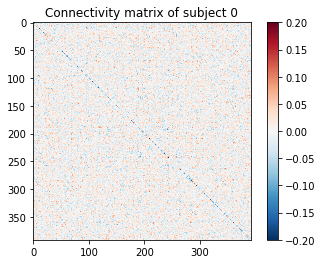

In [19]:
# Display first connectivity matrix in females using matplotlib

import matplotlib.pyplot as plt

plt.imshow(females_corrmatrices[0], vmax=.20, vmin=-.20, cmap='RdBu_r')
plt.colorbar()
plt.title('Connectivity matrix of subject 0')

In [22]:
#Data parsed by age only

# Juvenile - Early Adolescence (2-13)
# Middle - Late Adolescence (14-21)
# Adult (22+)

age = abide.phenotypic['AGE_AT_SCAN']
age_names = ['AGE_AT_SCAN', 'rois_cc400']
age_data = pd.DataFrame([age, abide.rois_cc400]).transpose()
age_data.columns = age_names
print("Shape of age data: ", age_data.shape)

juvenile_earlyad = age_data[age_data['AGE_AT_SCAN']<=13]['rois_cc400']
print('Juvenile to early adolescence (2-13) shape: ', juvenile_earlyad.shape)

middlead_latead = age_data[age_data['AGE_AT_SCAN']>13][age_data['AGE_AT_SCAN']<22]['rois_cc400']
print('Middle adolenscence to late adolescence (14-21) shape: ', middlead_latead.shape)

adult = age_data[age_data['AGE_AT_SCAN']>=22]['rois_cc400']
print('Adult (22+) shape: ', adult.shape)

Shape of age data:  (50, 2)
Juvenile to early adolescence (2-13) shape:  (11,)
Middle adolenscence to late adolescence (14-21) shape:  (28,)
Adult (22+) shape:  (11,)


In [23]:
# Tangent embedded connectivity matrices for age

juvenile_corrmeasure = ConnectivityMeasure(kind='tangent')
juvenile_corrmatrices = juvenile_corrmeasure.fit_transform(juvenile_earlyad)

middlead_corrmeasure = ConnectivityMeasure(kind='tangent')
middlead_corrmatrices = middlead_corrmeasure.fit_transform(middlead_latead)

adult_corrmeasure = ConnectivityMeasure(kind='tangent')
adult_corrmatrices = adult_corrmeasure.fit_transform(adult)

In [24]:
print(adult_corrmatrices.shape)
print(adult_corrmatrices[0].shape)

(11, 392, 392)
(392, 392)


Text(0.5, 1.0, 'Connectivity matrix of subject 0')

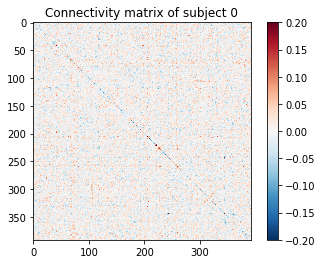

In [25]:
# Display first connectivity matrix in juvenile_earlyad using matplotlib

import matplotlib.pyplot as plt

plt.imshow(juvenile_corrmatrices[0], vmax=.20, vmin=-.20, cmap='RdBu_r')
plt.colorbar()
plt.title('Connectivity matrix of subject 0')

In [26]:
#Data parsed by age and gender

age_gender_names = ['AGE_AT_SCAN', 'SEX', 'rois_cc400']
age_gender_data = pd.DataFrame([age, gender, abide.rois_cc400]).transpose()
age_gender_data.columns = age_gender_names
print("Shape of age and gender data: ", age_gender_data.shape)


#Female age ranges
female_juvenile_earlyad = age_gender_data[age_gender_data['AGE_AT_SCAN']<=13][age_gender_data['SEX']==2]['rois_cc400']
print('Female juvenile to early adolescence (2-13) shape: ', female_juvenile_earlyad.shape)

female_middlead_latead = age_gender_data[age_gender_data['AGE_AT_SCAN']>13][age_gender_data['AGE_AT_SCAN']<22][age_gender_data['SEX']==2]['rois_cc400']
print('Female middle adolenscence to late adolescence (14-21) shape: ', female_middlead_latead.shape)

female_adult = age_gender_data[age_gender_data['AGE_AT_SCAN']>=22][age_gender_data['SEX']==2]['rois_cc400']
print('Female adult (22+) shape: ', female_adult.shape)


#Male age ranges
male_juvenile_earlyad = age_gender_data[age_gender_data['AGE_AT_SCAN']<=13][age_gender_data['SEX']==1]['rois_cc400']
print('Male juvenile to early adolescence (2-13) shape: ', male_juvenile_earlyad.shape)

male_middlead_latead = age_gender_data[age_gender_data['AGE_AT_SCAN']>13][age_gender_data['AGE_AT_SCAN']<22][age_gender_data['SEX']==1]['rois_cc400']
print('Male middle adolenscence to late adolescence (14-21) shape: ', male_middlead_latead.shape)

male_adult = age_gender_data[age_gender_data['AGE_AT_SCAN']>=22][age_gender_data['SEX']==1]['rois_cc400']
print('Male adult (22+) shape: ', male_adult.shape)

Shape of age and gender data:  (50, 3)
Female juvenile to early adolescence (2-13) shape:  (2,)
Female middle adolenscence to late adolescence (14-21) shape:  (5,)
Female adult (22+) shape:  (0,)
Male juvenile to early adolescence (2-13) shape:  (9,)
Male middle adolenscence to late adolescence (14-21) shape:  (23,)
Male adult (22+) shape:  (11,)


In [27]:
# Tangent embedded connectivity matrices for age and gender

female_juvenile_corrmeasure = ConnectivityMeasure(kind='tangent')
female_juvenile_corrmatrices = female_juvenile_corrmeasure.fit_transform(female_juvenile_earlyad)

female_middlead_corrmeasure = ConnectivityMeasure(kind='tangent')
female_middlead_corrmatrices = female_middlead_corrmeasure.fit_transform(female_middlead_latead)

#no female adults within the first 50 individuals 
#female_adult_corrmeasure = ConnectivityMeasure(kind='tangent')
#female_adult_corrmatrices = female_adult_corrmeasure.fit_transform(female_adult)

male_juvenile_corrmeasure = ConnectivityMeasure(kind='tangent')
male_juvenile_corrmatrices = juvenile_corrmeasure.fit_transform(male_juvenile_earlyad)

male_middlead_corrmeasure = ConnectivityMeasure(kind='tangent')
male_middlead_corrmatrices = male_middlead_corrmeasure.fit_transform(male_middlead_latead)

male_adult_corrmeasure = ConnectivityMeasure(kind='tangent')
male_adult_corrmatrices = adult_corrmeasure.fit_transform(male_adult)

In [28]:
print(male_adult_corrmatrices.shape)
print(male_adult_corrmatrices[0].shape)

(11, 392, 392)
(392, 392)


Text(0.5, 1.0, 'Connectivity matrix of subject 0')

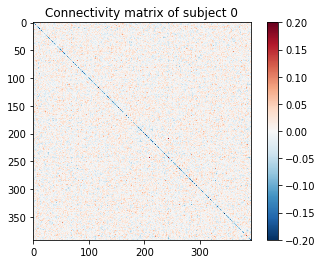

In [29]:
# Display first connectivity matrix in female_juvenile_earlyad using matplotlib

import matplotlib.pyplot as plt

plt.imshow(female_juvenile_corrmatrices[0], vmax=.20, vmin=-.20, cmap='RdBu_r')
plt.colorbar()
plt.title('Connectivity matrix of subject 0')